In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import json

clicks=[]
conversionsValue=[]
conversions=[]
costPAConv=[]
engagements=[]
ctr=[]
allConv=[]
avgCost=[]
impressions=[]
interactions=[]
interactionRate=[]
date=[]
avgCpc=[]
avgCpe=[]
avgCpm=[]
hour=[]
with open('Wiiny App promotion.json') as f:
    data = json.load(f)

for datum in data:
    clicks.append(datum['metrics']['clicks'])
    conversionsValue.append(datum['metrics']['conversionsValue'])
    date.append(datum['segments']['date'])
    hour.append(datum['segments']['hour'])
    conversions.append(datum['metrics']['conversions'])
    
    costPAConv.append(datum['metrics'].get('costPerConversion'))
    
    engagements.append(datum['metrics']['engagements'])
    ctr.append(datum['metrics'].get('ctr'))
    allConv.append(datum['metrics']['conversions'])
    avgCost.append(datum['metrics'].get('averageCost'))
    avgCpc.append(datum['metrics'].get('averageCpc'))
    avgCpe.append(datum['metrics'].get('averageCpe'))
    avgCpm.append(datum['metrics'].get('averageCpm'))
    impressions.append(float(datum['metrics']['impressions']))
    interactions.append(datum['metrics']['interactions'])
    interactionRate.append(datum['metrics'].get('interactionRate'))
     
   


df=pd.DataFrame()
df['date']=date
df['hour']=hour
df['clicks']=clicks
df['conversionsValue']=conversionsValue
df['conversions']=conversions
df['costPAConv']=costPAConv
df['engagements']=engagements
df['ctr']=ctr
df['allConv']=allConv
df['avgCost']=avgCost
df['avgCpc']=avgCpc
df['avgCpe']=avgCpe
df['avgCpm']=avgCpm
df['impressions']=impressions
df['interactions']=interactions
df['interactionRate']=interactionRate
df=df.fillna(0)
df['costPAConv']=df['costPAConv']/1000000
df['avgCost']=df['avgCost']/1000000
df['avgCpc']=df['avgCpc']/1000000
df['avgCpe']=df['avgCpe']/1000000
df['avgCpm']=df['avgCpm']/1000000
df['spend']=df['conversionsValue']/df['costPAConv']
df['day']=pd.to_datetime(df['date']).dt.day
df['Time']=df['hour']#+24*(df['day']-1)
df['week']=pd.to_datetime(df['date']).dt.week

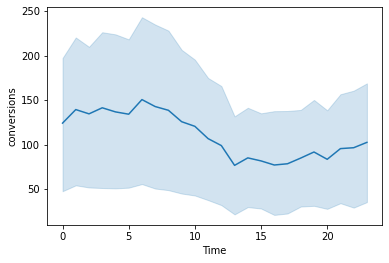

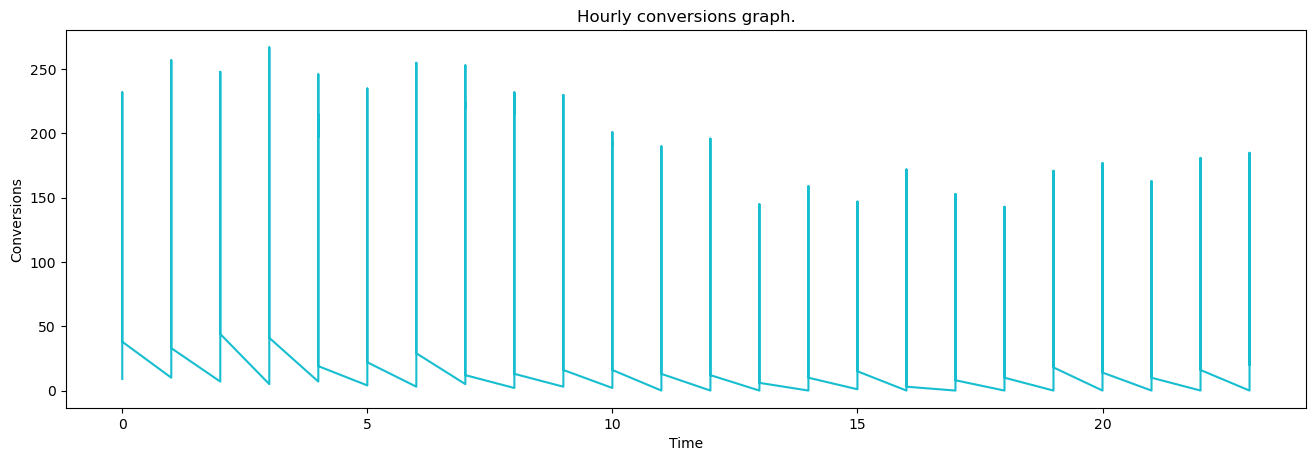

NameError: name 'model_fit' is not defined

In [12]:
def timing_analysis(df):
    grouped = pd.DataFrame(df.groupby(['Time','week'])['conversions'].sum().reset_index())
    plot = sns.lineplot(x='Time', y='conversions', data=grouped)
    return plot, grouped
plot,grouped=timing_analysis(df)
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Conversions', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped, x=grouped.Time, y=grouped.conversions, title='Hourly conversions graph.') 
from statsmodels.tsa.arima_model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(grouped.conversions, order=(3,1,2))
model_fit = model.fit(disp=0)
model_fit.plot_predict(dynamic=False)
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


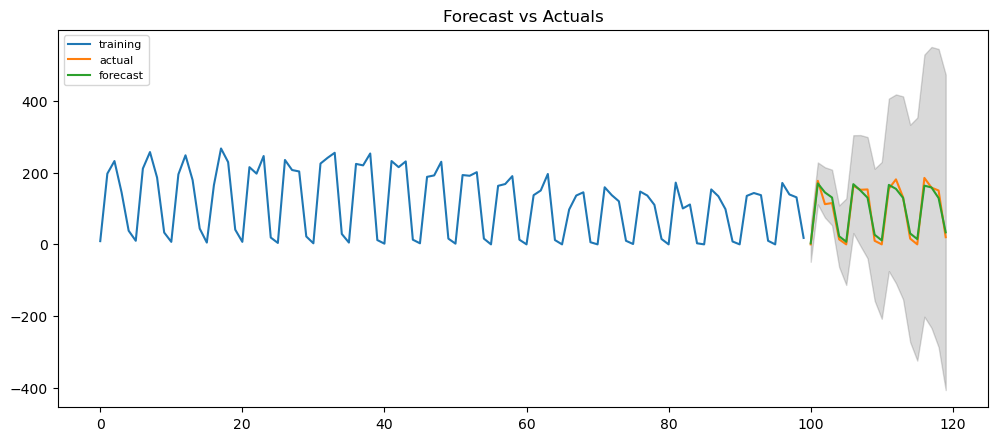

In [20]:
from statsmodels.tsa.stattools import acf
grouped=pd.DataFrame(df.groupby(['Time','week'])['conversions'].sum().reset_index())
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = grouped.conversions[:100]
test = grouped.conversions[100:]
# Build Model
model = ARIMA(train, order=(5, 2, 0)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


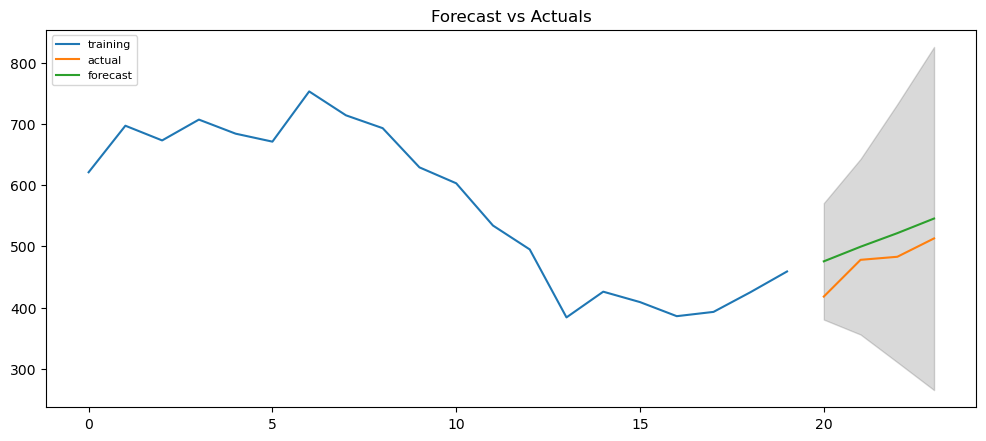

In [18]:
grouped=pd.DataFrame(df.groupby(['Time'])['conversions'].sum().reset_index())
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = grouped.conversions[:20]
test = grouped.conversions[20:]
# Build Model
model = ARIMA(train, order=(4, 2, 0)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(4, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()